In [11]:
import nltk
import inflect
import string
import re
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
    
from wordcloud import WordCloud

from collections import Counter
from collections import OrderedDict
def txt_file_to_string(file_path):  
        with open(file_path, "r", encoding = "utf8") as curr:
         text =curr.read()
         text = text.replace("\n", " ").replace("\\r", " ")
        return text
#code for converting text file to string   
text=txt_file_to_string("uc.txt")
print(text)

   Understanding Gp 7elcolele-lolyy  Ronee tee eto  ees Understanding Cryptography Christof Paar - Jan Pelzl  Understanding Cryptography  A Textbook for Students and Practitioners  Foreword by Bart Preneel  D) Springer Prof. Dr.-Ing. Christof Paar  Chair for Embedded Security  Department of Electrical Engineering and Information Sciences  Ruhr-Universitat Bochum  44780 Bochum  Germany  cpaar @ crypto.rub.de  ISBN 978-3-642-04 100-6 DOI 10.1007/978-3-642-04101-3  Springer Heidelberg Dordrecht London New York ACM Computing Classification (1998): E.3, K.4.4, K.6.5. Library of Congress Control Number: 2009940447  © Springer- Verlag Berlin Heidelberg 2010 This work is subject to copyright. All rights are reserved, whether the whole or part of the material is  Dr.-Ing. Jan Pelzl  escrypt GmbH — Embedded Security Zentrum fiir IT-Sicherheit Lise-Meitner-Allee 4  44801 Bochum  Germany  jpelzl@escrypt.com  e-ISBN 978-3-642-04101-3  concemed, specifically the rights of translation, reprinting,

In [12]:
def pre_process(str):

        start_index = str.find('* START OF THE PROJECT ')
        end_index = str.find('* END OF THE PROJECT ')
        str = str[start_index:end_index]
    
        # Converting entire string to lowercase
        str = str.lower()
    
       # Expanding some Contractions
        str = re.sub("won\\'t", "will not", str)
        str = re.sub("can\\'t", "can not", str)
    
        # Expanding more Contractions according to general assumption
        str = re.sub("n\\'t", " not", str)
        str = re.sub("\\'re", " are", str)
        str = re.sub("\\'s", " is", str)
        str = re.sub("\\'d", " would", str)
        str = re.sub("\\'ll", " will", str)
        str = re.sub("\\'t", " not", str)
        str = re.sub("\\'ve", " have", str)
        str = re.sub("\\'m", " am", str)
        
        
        # Removing all punctuations by replacing everyhting other than whitespace characters, a-z, A-Z, 0-9 and '_' by empty string 
        # followed by replacing '_' by empty string
        str = re.sub("[^\\w\\s]", "", str)
        str = re.sub("_", "", str)
    
       #Removing chapter number headings if any
        str = re.sub("chapter [0-9]{1,3}", "", str)

       # Replacing one or more continuous whitespace characters by space
        str = re.sub("[\\s]+", " ", str)
       
        return str



p = inflect.engine()
 
# convert number into words
def convert_number(text):
    # split string into list of words
    temp_str = text.split()
    # initialise empty list
    new_string = []
 
    for word in temp_str:
        # if word is a digit, convert the digit
        # to numbers and append into the new_string list
        if word.isdigit():
            temp = p.number_to_words(word)
            new_string.append(temp)
 
        # append the word as it is
        else:
            new_string.append(word)
 
    # join the words of new_string to form a string
    temp_str = ' '.join(new_string)
    return temp_str

#Preprocessed text
text=pre_process(text)
p = inflect.engine()
text=convert_number(text)
print(text)

start of the project xi table of contents one introduction to cryptography and data security eleven overview of cryptology and this book twelve symmetric cryptography zero c eee eee eee eee one hundred and twenty-one basics zero ccc cece eens one hundred and twenty-two simple symmetric encryption the substitution cipher thirteen cryptanalysis zero zero eee eee eee one hundred and thirty-one general thoughts on breaking cryptosystems one hundred and thirty-two how many key bits are enough fourteen modular arithmetic and more historical ciphers one hundred and forty-one modular arithmetic two eee eee eee one hundred and forty-two integer rings000 zero ccc cece eens one hundred and forty-three shift cipher or caesar cipher twenty thousand and five one hundred and forty-four affine cipher zero 0c cee ees fifteen discussion and further reading zero c cece eee eee sixteen lessons learned zero problems twenty-two cence eee eee two stream ciphers zero zero cece twenty-one introduction zero e e

In [13]:


#Tokenize before removing stop words
before_stop_words=word_tokenize(text)
before_stop_words

['start',
 'of',
 'the',
 'project',
 'xi',
 'table',
 'of',
 'contents',
 'one',
 'introduction',
 'to',
 'cryptography',
 'and',
 'data',
 'security',
 'eleven',
 'overview',
 'of',
 'cryptology',
 'and',
 'this',
 'book',
 'twelve',
 'symmetric',
 'cryptography',
 'zero',
 'c',
 'eee',
 'eee',
 'eee',
 'eee',
 'one',
 'hundred',
 'and',
 'twenty-one',
 'basics',
 'zero',
 'ccc',
 'cece',
 'eens',
 'one',
 'hundred',
 'and',
 'twenty-two',
 'simple',
 'symmetric',
 'encryption',
 'the',
 'substitution',
 'cipher',
 'thirteen',
 'cryptanalysis',
 'zero',
 'zero',
 'eee',
 'eee',
 'eee',
 'one',
 'hundred',
 'and',
 'thirty-one',
 'general',
 'thoughts',
 'on',
 'breaking',
 'cryptosystems',
 'one',
 'hundred',
 'and',
 'thirty-two',
 'how',
 'many',
 'key',
 'bits',
 'are',
 'enough',
 'fourteen',
 'modular',
 'arithmetic',
 'and',
 'more',
 'historical',
 'ciphers',
 'one',
 'hundred',
 'and',
 'forty-one',
 'modular',
 'arithmetic',
 'two',
 'eee',
 'eee',
 'eee',
 'one',
 'hundred'

In [14]:
#Frequency distribution of all the word tokens
T1_frequency_distribution = FreqDist(before_stop_words)
T1_frequency_distribution_org = T1_frequency_distribution
T1_frequency_distribution_org

FreqDist({'the': 7820, 'and': 4580, 'of': 3247, 'a': 3037, 'is': 2850, 'one': 2512, 'hundred': 2458, 'in': 2328, 'to': 1917, 'two': 1493, ...})

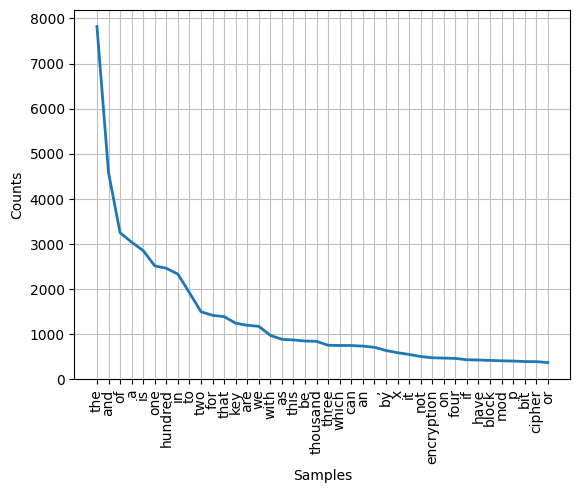

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [15]:

#to get the graphical presentation of frequency of tokens
T1_frequency_distribution_org.plot(40)


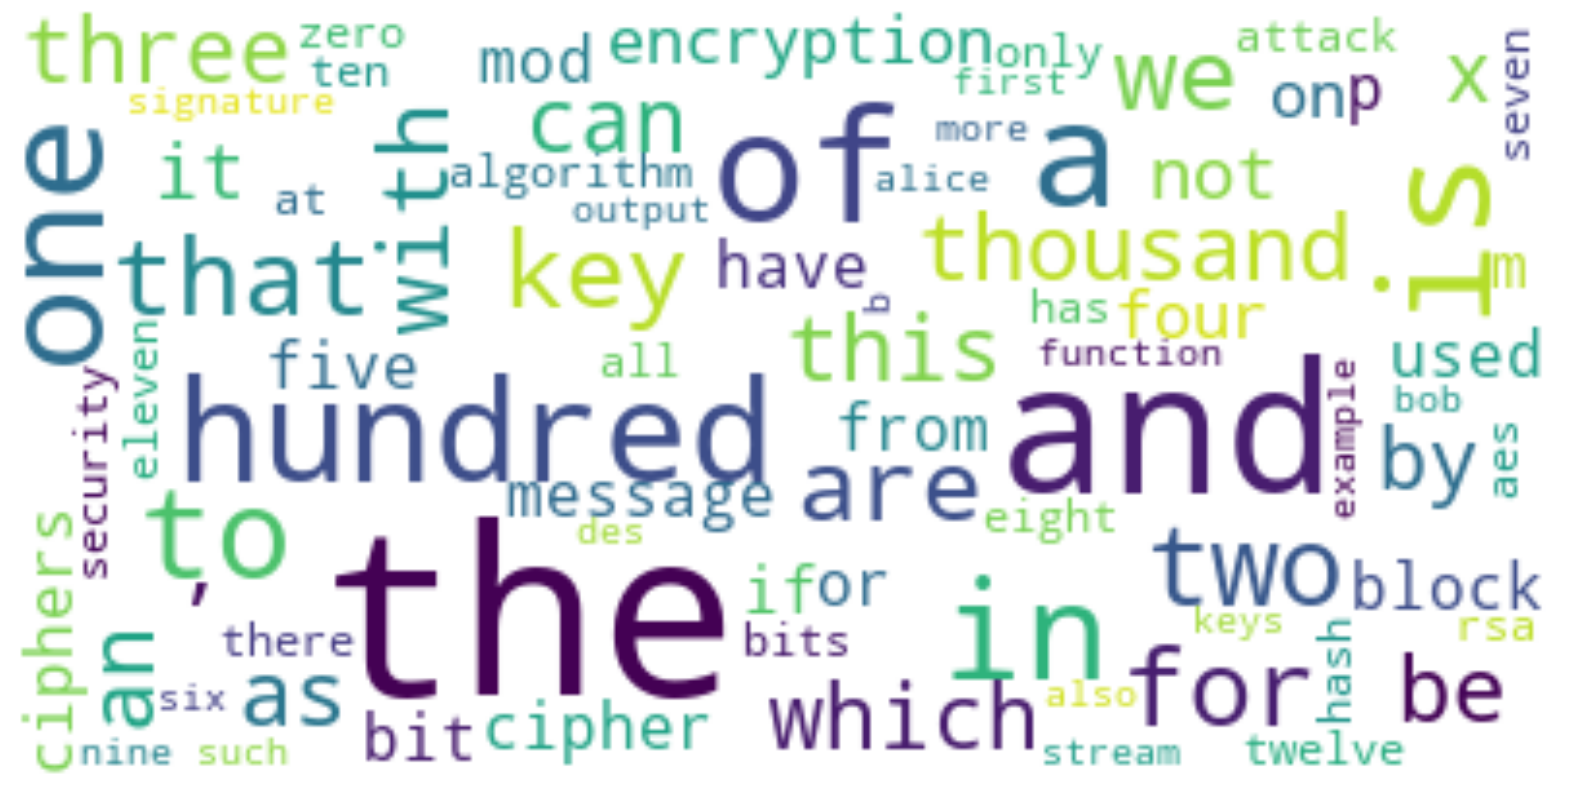

In [16]:

#Creating the wordcloud of these tokens
dictionary = Counter(T1_frequency_distribution)
cloud = WordCloud(max_font_size = 60, max_words = 80, background_color = "white").generate_from_frequencies(dictionary)
plt.figure(figsize = (20, 20))
plt.imshow(cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [17]:
#Removing stopwords from T1\
remove_these = set(stopwords.words('english'))
Cleaned_T1 = [w for w in before_stop_words if not w in remove_these]
Cleaned_T1

['start',
 'project',
 'xi',
 'table',
 'contents',
 'one',
 'introduction',
 'cryptography',
 'data',
 'security',
 'eleven',
 'overview',
 'cryptology',
 'book',
 'twelve',
 'symmetric',
 'cryptography',
 'zero',
 'c',
 'eee',
 'eee',
 'eee',
 'eee',
 'one',
 'hundred',
 'twenty-one',
 'basics',
 'zero',
 'ccc',
 'cece',
 'eens',
 'one',
 'hundred',
 'twenty-two',
 'simple',
 'symmetric',
 'encryption',
 'substitution',
 'cipher',
 'thirteen',
 'cryptanalysis',
 'zero',
 'zero',
 'eee',
 'eee',
 'eee',
 'one',
 'hundred',
 'thirty-one',
 'general',
 'thoughts',
 'breaking',
 'cryptosystems',
 'one',
 'hundred',
 'thirty-two',
 'many',
 'key',
 'bits',
 'enough',
 'fourteen',
 'modular',
 'arithmetic',
 'historical',
 'ciphers',
 'one',
 'hundred',
 'forty-one',
 'modular',
 'arithmetic',
 'two',
 'eee',
 'eee',
 'eee',
 'one',
 'hundred',
 'forty-two',
 'integer',
 'rings000',
 'zero',
 'ccc',
 'cece',
 'eens',
 'one',
 'hundred',
 'forty-three',
 'shift',
 'cipher',
 'caesar',
 'cip

In [18]:
#Frequency distribution of word tokens after removing stop words
T1_frequency_distribution_withoutstopwords = FreqDist(Cleaned_T1)
T1_frequency_distribution_withoutstopwords

FreqDist({'one': 2512, 'hundred': 2458, 'two': 1493, 'key': 1239, 'thousand': 837, 'three': 750, ',': 705, 'x': 585, 'encryption': 473, 'four': 458, ...})

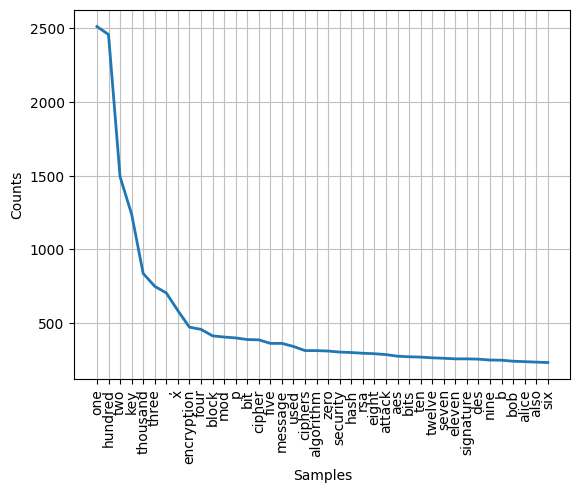

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [19]:
#Graphical representation of frequency distribution after removing stop words
T1_frequency_distribution_withoutstopwords.plot(40)

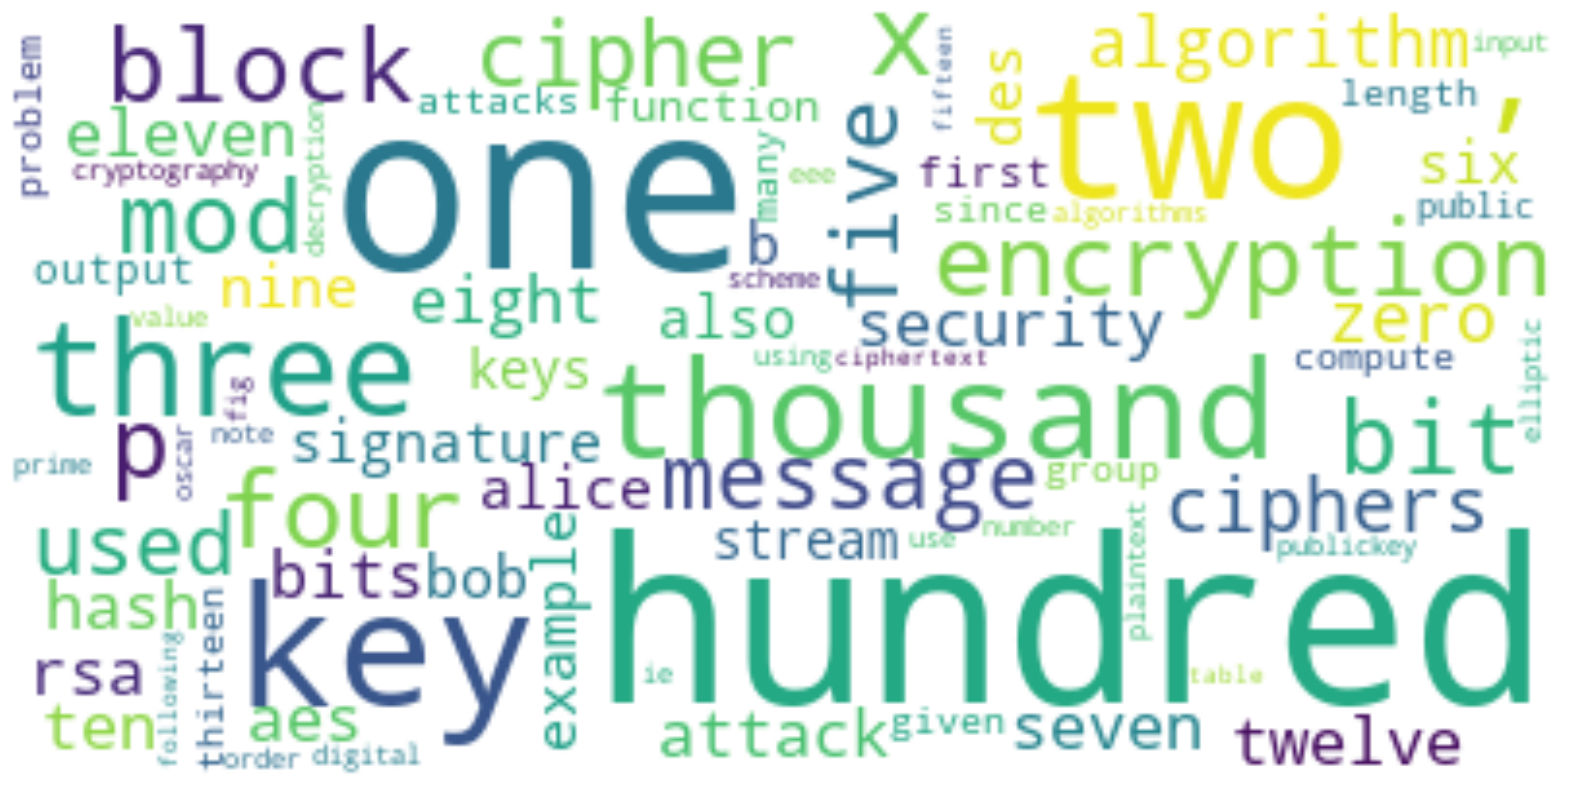

In [20]:
#Creating word cloud of tokens after removinbg stop words 
dictionary = Counter(Cleaned_T1)
cloud = WordCloud(max_font_size = 60, max_words = 80, background_color = "white").generate_from_frequencies(dictionary)
plt.figure(figsize = (20, 20))
plt.imshow(cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [21]:
#Evaluating frequency on basis of word length with stop words
length_frequency_T1 = {}
for i, j in T1_frequency_distribution_org.items():
        x = len(i)
        if(x in length_frequency_T1):
            length_frequency_T1[x] += j
        else:
            length_frequency_T1[x] = j

            
length_frequency_T1 = OrderedDict(sorted(length_frequency_T1.items()))
length_frequency_T1

OrderedDict([(1, 7221),
             (2, 20716),
             (3, 29466),
             (4, 16131),
             (5, 12296),
             (6, 9315),
             (7, 11095),
             (8, 7598),
             (9, 5897),
             (10, 4787),
             (11, 2421),
             (12, 2153),
             (13, 937),
             (14, 597),
             (15, 232),
             (16, 39),
             (17, 68),
             (18, 5),
             (19, 39),
             (20, 9),
             (21, 7),
             (22, 2),
             (23, 3),
             (24, 1),
             (25, 2),
             (26, 2),
             (27, 1),
             (29, 1),
             (31, 1),
             (33, 1),
             (38, 1),
             (46, 1),
             (49, 1),
             (51, 1)])

In [22]:
#Evaluating frequency on basis of word length without stop words
Length_frequency_T1_withoutstopwords={}
for i, j in T1_frequency_distribution_withoutstopwords.items():
        x = len(i)
        if(x in Length_frequency_T1_withoutstopwords):
            Length_frequency_T1_withoutstopwords[x] += j
        else:
            Length_frequency_T1_withoutstopwords[x] = j

            
Length_frequency_T1_withoutstopwords = OrderedDict(sorted(Length_frequency_T1_withoutstopwords.items()))
Length_frequency_T1_withoutstopwords

OrderedDict([(1, 3193),
             (2, 3456),
             (3, 11139),
             (4, 9128),
             (5, 10200),
             (6, 9051),
             (7, 10696),
             (8, 7598),
             (9, 5894),
             (10, 4782),
             (11, 2421),
             (12, 2153),
             (13, 937),
             (14, 597),
             (15, 232),
             (16, 39),
             (17, 68),
             (18, 5),
             (19, 39),
             (20, 9),
             (21, 7),
             (22, 2),
             (23, 3),
             (24, 1),
             (25, 2),
             (26, 2),
             (27, 1),
             (29, 1),
             (31, 1),
             (33, 1),
             (38, 1),
             (46, 1),
             (49, 1),
             (51, 1)])

In [23]:
#Doing PoS tagging for T1 (using Penn Treebank Tagset) and obtaining distribution of tags for it \n",
tokenized = sent_tokenize(text)
for i in tokenized:
     
    # Word tokenizers is used to find the words
    # and punctuation in a string
    wordsList = nltk.word_tokenize(i)
 
    # removing stop words from wordList
    wordsList = [w for w in wordsList if not w in remove_these]
 
    #  Using a Tagger. Which is part-of-speech
    # tagger or POS-tagger.
    tagged = nltk.pos_tag(wordsList)
 
    print(tagged)

[('start', 'NN'), ('project', 'NN'), ('xi', 'NNP'), ('table', 'NN'), ('contents', 'NNS'), ('one', 'CD'), ('introduction', 'NN'), ('cryptography', 'NN'), ('data', 'NNS'), ('security', 'NN'), ('eleven', 'RB'), ('overview', 'VBZ'), ('cryptology', 'NN'), ('book', 'NN'), ('twelve', 'NN'), ('symmetric', 'JJ'), ('cryptography', 'NN'), ('zero', 'CD'), ('c', 'NN'), ('eee', 'NN'), ('eee', 'NN'), ('eee', 'NN'), ('eee', 'VBP'), ('one', 'CD'), ('hundred', 'CD'), ('twenty-one', 'NN'), ('basics', 'NNS'), ('zero', 'CD'), ('ccc', 'NNS'), ('cece', 'VBP'), ('eens', 'VBZ'), ('one', 'CD'), ('hundred', 'VBD'), ('twenty-two', 'JJ'), ('simple', 'JJ'), ('symmetric', 'JJ'), ('encryption', 'NN'), ('substitution', 'NN'), ('cipher', 'NN'), ('thirteen', 'JJ'), ('cryptanalysis', 'NN'), ('zero', 'NN'), ('zero', 'CD'), ('eee', 'NN'), ('eee', 'CC'), ('eee', 'VB'), ('one', 'CD'), ('hundred', 'CD'), ('thirty-one', 'JJ'), ('general', 'JJ'), ('thoughts', 'NNS'), ('breaking', 'VBG'), ('cryptosystems', 'NNS'), ('one', 'CD'),